## Numpy 다차원 배열의 Indexing

- 기본 인덱싱
- 고급 인덱싱
- 필드 엑세스

## Numpy 다차원 배열의 연산

## Numpy 함수

### 기본 인덱싱과 슬라이싱

- $ 0 <= n_i < d_i $
    - i : axis 번호
    - n_i : axis i의 번호 인덱스
    - d_i : axis i의 원소의 갯수
    
- n_i < 0 인 경우 n_i + d_i
- 기본 슬라이싱 문법 : start  : end : step

In [90]:
import numpy as np
a = np.arange(48).reshape(8,6)
a

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41],
       [42, 43, 44, 45, 46, 47]])

In [2]:
a[(6,3)]

39

In [3]:
a[6][3]

39

In [7]:
a[(-2, -3)]

39

In [8]:
a[-2, -3]

39

In [9]:
a[-2][-3]

39

In [10]:
a[-2][3]

39

In [11]:
a

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41],
       [42, 43, 44, 45, 46, 47]])

In [13]:
a[:5, 2]

array([ 2,  8, 14, 20, 26])

In [14]:
a[:5:2, 2]

array([ 2, 14, 26])

In [15]:
a[1, :]

array([ 6,  7,  8,  9, 10, 11])

In [17]:
a[1, 1:3]

array([7, 8])

In [89]:
a

array([1, 2, 3])

In [19]:
a[([0,2], [1,3])]

array([ 1, 15])

In [20]:
a[[0,1], [1,3]]

array([1, 9])

In [21]:
a[(0,1), (1,3)]

array([1, 9])

- 배열 a에서 0,5,42,47을 원소로 갖는 배열 만들기

In [91]:
a[[0,0,7,7,], [0,5, 0,5]]

array([ 0,  5, 42, 47])

In [93]:
a[[0,0,7,7], [0,5,0,5]]

array([ 0,  5, 42, 47])

In [24]:
a[[[0, 0], [7, 7]], [[0, 5], [0, 5]]]

array([[ 0,  5],
       [42, 47]])

In [25]:
a

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41],
       [42, 43, 44, 45, 46, 47]])

In [28]:
a[[0,3,1], ::2]

array([[ 0,  2,  4],
       [18, 20, 22],
       [ 6,  8, 10]])

### Numpy 다차원 배열의 부울 배열 인덱싱

In [95]:
a = np.arange(0,10,2)
a

array([0, 2, 4, 6, 8])

In [96]:
idx = np.array([True, True, False, True, False])
a[idx] # 배열에 해당하는 idx 값이 True 일 경우만 반환.

array([0, 2, 6])

In [31]:
1 < a

array([False,  True,  True,  True,  True])

In [32]:
a < 3

array([ True,  True, False, False, False])

In [33]:
(1 < a) & (a < 3)

array([False,  True, False, False, False])

In [34]:
index = (1 < a) & (a < 3)
index

array([False,  True, False, False, False])

In [35]:
a[index]

array([2])

In [36]:
import matplotlib.pyplot as plt
from scipy import misc
face = misc.face()


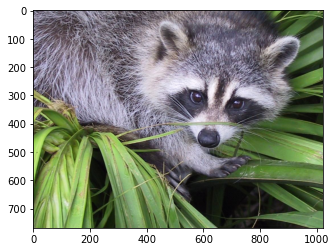

In [37]:
plt.imshow(face)
plt.show()

In [97]:
face.shape

# row = 768 
# col = 1024
# channel = 3

(768, 1024, 3)

### 타원을 이용해서 raccoon 의 얼굴 부분만 남기고 검은색으로 변경하기.
- 타원의 방정식

$$ \frac{(x - x_c)^2}{a^2} + \frac{(y-y_c)^2}{b^2} = 1 $$

- 타원의 외부

$$ \frac{(x - x_c)^2}{a^2} + \frac{(y-y_c)^2}{b^2} >= 1 $$

- 영상에서 왼쪽 위 모서리 좌표가 (0,0) 이고, 세로축의 아래 방향을 x축 양의 방향, 가로축의 오른쪽 방향을 y축의 양의 방향으로 정의한다.

In [98]:
# 다차원 배열의 meshgrid 반환.
np.ogrid[0:5, 0:3]

[array([[0],
        [1],
        [2],
        [3],
        [4]]),
 array([[0, 1, 2]])]

In [99]:
X, Y = np.ogrid[0:face.shape[0], 0:face.shape[1]]
X.shape, Y.shape

((768, 1), (1, 1024))

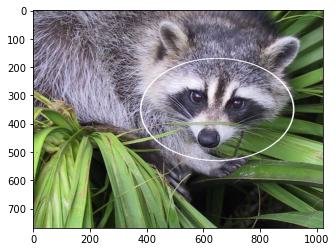

In [102]:
face = misc.face()
center = np.array([350,650]) # 중심좌표 

#a는 row, b는 col
a = 180
b = 270

idx = (X-center[0])**2/a**2 + (Y-center[1])**2 / b**2 > 0.98
idx &= (X-center[0])**2/a**2 + (Y-center[1])**2 / b**2 < 1.02 # 0.04 길이의 반원 생성
face_with_ellipse = face.copy()
face_with_ellipse[idx] = (255, 255, 255)
plt.imshow(face_with_ellipse)
plt.show()

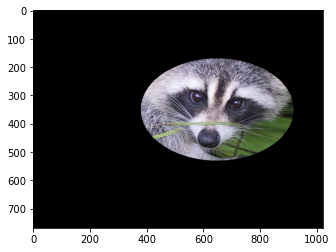

In [103]:
center = np.array([350,650])
a = 180
b = 270
idx = (X-center[0])**2/a**2 + (Y-center[1])**2 / b**2 > 1
cropped = face.copy()
cropped[idx] = (0, 0, 0)
plt.imshow(cropped)
plt.show()


## 마름모를 이용해서 raccoon의 얼굴부분만 남기고 검은색으로 변경하기
- 네 꼭지점의 좌표 : A(350, 380), B(170, 650), C(350, 920), D(530, 650)
- 두 점(x1, y1)과 (x2,y2)를 잇는 직선의 방정식

$$ y - y_1 = \frac{y_2 - y_1}{x_2 - x_1}(x - x_1) $$

또는

$$ y - y_2 = \frac{y_2 - y_1}{x_2 - x_1}(x - x_2) $$

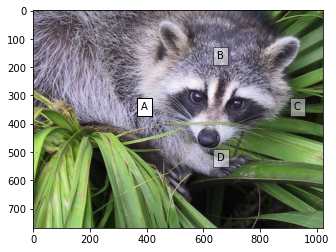

In [46]:
import matplotlib.pyplot as plt
A = np.array([350, 380])
B = np.array([170, 650])
C = np.array([350, 920])
D = np.array([530, 650])
plt.imshow(face)
plt.text(380, 350, "A", bbox=dict(facecolor='white', alpha=1))
plt.text(650, 170, "B", bbox=dict(facecolor='white', alpha=0.5))
plt.text(920, 350, "C", bbox=dict(facecolor='white', alpha=0.5))
plt.text(650, 530, "D", bbox=dict(facecolor='white', alpha=0.5))
plt.show()

[[ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


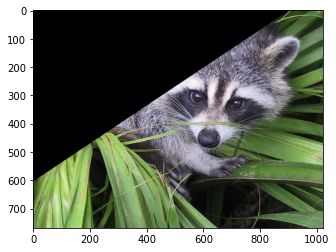

In [136]:
A = np.array([350, 380])
B = np.array([170, 650])
C = np.array([350, 920])
D = np.array([530, 650])
# 직선 AB 윗 부분
slopeAB = (B-A)[1] / (B-A)[0]
idx1 = Y - A[1] < slopeAB * (X - A[0])
print(idx1)
plt.imshow(idx1)
img1 = face.copy()
img1[idx1] = (0,0,0)
plt.imshow(img1)
plt.show()


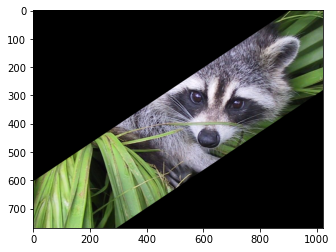

In [48]:
# 직선 CD 밑부분 
idx2 = Y - C[1] > slopeAB * (X - C[0]) #어짜피 위에랑 기울기는 같기 떄문에 slopeAB 사용
img1[idx2] = (0,0,0)
plt.imshow(img1)
plt.show()


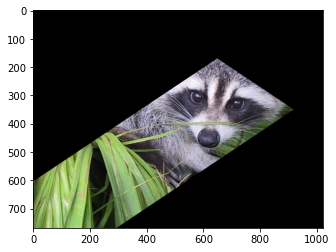

In [49]:
# 직선 BC 윗부분
slopeBC = (C-B)[1] / (C-B)[0]
idx3 = Y - C[1] > slopeBC * (X - C[0])
img1[idx3] = (0,0,0)
plt.imshow(img1)
plt.show()


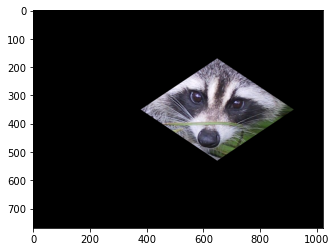

In [50]:
# 직선 DA 아랫부분
idx4 = Y - A[1] < slopeBC * (X - A[0])
img1[idx4] = (0,0,0)
plt.imshow(img1)
plt.show()


[[ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


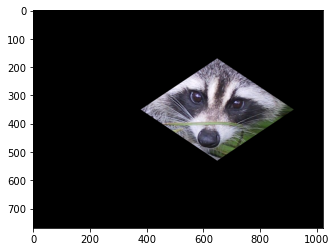

In [135]:
face = misc.face()
A = np.array([350, 380])
B = np.array([170, 650])
C = np.array([350, 920])
D = np.array([530, 650])
# 직선 AB 윗 부분
slopeAB = (B-A)[1] / (B-A)[0]
idx1 = Y - A[1] < slopeAB * (X - A[0])
plt.imshow(idx1)
print(idx1)
idx2 = Y - C[1] > slopeAB * (X - C[0])
slopeBC = (C-B)[1] / (C-B)[0]
idx3 = Y - C[1] > slopeBC * (X - C[0])
idx4 = Y - A[1] < slopeBC * (X - A[0])
idx = idx1 | idx2 | idx3 | idx4
plt.imshow(idx)
img2[idx] = (0,0,0)
plt.imshow(img2)
plt.show()

In [139]:
a = np.array([1, 2, 3, 3, 2, 5]).reshape(2,3)
b = np.array([[-1,3,5],[1,4,2]])
c = a + b
print(a)
print(b)
print(c)


[[1 2 3]
 [3 2 5]]
[[-1  3  5]
 [ 1  4  2]]
[[0 5 8]
 [4 6 7]]


In [140]:
np.add(a,b)

array([[0, 5, 8],
       [4, 6, 7]])

In [141]:
a-b

array([[ 2, -1, -2],
       [ 2, -2,  3]])

In [142]:
np.subtract(a,b)

array([[ 2, -1, -2],
       [ 2, -2,  3]])

In [143]:
a*b

array([[-1,  6, 15],
       [ 3,  8, 10]])

In [144]:
# 개별 원소들을 곱하는 형태.
np.multiply(a,b,)

array([[-1,  6, 15],
       [ 3,  8, 10]])

In [145]:
a/b

array([[-1.        ,  0.66666667,  0.6       ],
       [ 3.        ,  0.5       ,  2.5       ]])

In [146]:
np.divide(a,b)

array([[-1.        ,  0.66666667,  0.6       ],
       [ 3.        ,  0.5       ,  2.5       ]])

In [147]:
np.true_divide(a,b)

array([[-1.        ,  0.66666667,  0.6       ],
       [ 3.        ,  0.5       ,  2.5       ]])

In [148]:
a//b

array([[-1,  0,  0],
       [ 3,  0,  2]], dtype=int32)

In [149]:
np.floor_divide(a,b)

array([[-1,  0,  0],
       [ 3,  0,  2]], dtype=int32)

In [150]:
a % b

array([[0, 2, 3],
       [0, 2, 1]], dtype=int32)

In [151]:
np.mod(a,b)

array([[0, 2, 3],
       [0, 2, 1]], dtype=int32)

In [152]:
np.divmod(a,b)

(array([[-1,  0,  0],
        [ 3,  0,  2]], dtype=int32),
 array([[0, 2, 3],
        [0, 2, 1]], dtype=int32))

In [153]:
a**2

array([[ 1,  4,  9],
       [ 9,  4, 25]], dtype=int32)

In [154]:
pow(a,2)

array([[ 1,  4,  9],
       [ 9,  4, 25]], dtype=int32)

In [155]:
np.power(a,2)

array([[ 1,  4,  9],
       [ 9,  4, 25]], dtype=int32)

In [156]:
# 배열 안에 음수가 존재한다면 nan을 찍어냄.
np.sqrt(b)  

C:\Users\hallym\AppData\Local\Temp/ipykernel_24472/2578201199.py:2: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(b)


array([[       nan, 1.73205081, 2.23606798],
       [1.        , 2.        , 1.41421356]])

In [158]:
# 1/2 를 제곱한다 -> root
b**0.5

C:\Users\hallym\AppData\Local\Temp/ipykernel_24472/49366524.py:2: RuntimeWarning: invalid value encountered in power
  b**0.5


array([[       nan, 1.73205081, 2.23606798],
       [1.        , 2.        , 1.41421356]])

In [73]:
1/a

array([[1.        , 0.5       , 0.33333333],
       [0.33333333, 0.5       , 0.2       ]])

In [74]:
pow(a,b)

ValueError: Integers to negative integer powers are not allowed.

In [159]:
import numpy as np
a = np.array([1,2,3])
b = np.array([2,3,4])
a ** b

array([ 1,  8, 81], dtype=int32)

In [160]:
np.power(a,b)

array([ 1,  8, 81], dtype=int32)

In [78]:
# 2를 1bit 2bit 3bit 옮긴 연산 결과 출력
2 << a

array([ 4,  8, 16], dtype=int32)

In [161]:
# 1,2,3을 각각 2비트씩 옮긴 연산 결과 출력
a << 2

array([ 4,  8, 12], dtype=int32)

# Numpy에서 제공하는 math함수는 배열 형태
- math는 scaler 형태.

In [164]:
import numpy as np
x = np.array([0, 30, 45, 60, 90])
x = np.radians(x) # 주어진 x값을 radian값으로 반환함.
y = np.sin(x)
z = np.cos(x)
print(y)
print(z)

[0.         0.5        0.70710678 0.8660254  1.        ]
[1.00000000e+00 8.66025404e-01 7.07106781e-01 5.00000000e-01
 6.12323400e-17]


In [163]:
y = np.sin(x)
z = np.cos(x)
print(y)
print(z)

with np.printoptions(precision=3):
    print(y)
    print(z)

# supperess = True를 통해 e를 통한 출력결과 없앰. 
with np.printoptions(precision=3, suppress=True):
    print(y)
    print(z)

[0.         0.5        0.70710678 0.8660254  1.        ]
[1.00000000e+00 8.66025404e-01 7.07106781e-01 5.00000000e-01
 6.12323400e-17]
[0.    0.5   0.707 0.866 1.   ]
[1.000e+00 8.660e-01 7.071e-01 5.000e-01 6.123e-17]
[0.    0.5   0.707 0.866 1.   ]
[1.    0.866 0.707 0.5   0.   ]
